In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rho_soliton = 2.42e9#SM*kpc−3
m_axion = 2.44e-22#eV
G = 4.302e-6#kpc/SM(km/s)^2

In [3]:
r = np.linspace(0.,15.,100)

In [4]:
def rho_minor(r,rho_sol,m_a):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    d = (1. + (r/rsol)**2.)**8.
    return 1/d

In [5]:
def rho_mayor(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*(r_eps/r_s**3.)*(r_s + r_eps)**2.
    d = (r/r_s**3.)*(r_s + r)**2.
    return delta_NFW/d

In [6]:
rsol_1 = ((rho_soliton*0.037/2.42e9)*(m_axion/1.0e-22)**2.)**(-0.25)
r_eps_1 = rsol_1*np.sqrt(0.48**(-1./8.) - 1.)
rsol_2 = ((rho_soliton*0.057/2.42e9)*(m_axion/1.0e-22)**2.)**(-0.25)
r_eps_2 = rsol_2*np.sqrt(0.464**(-1./8.) - 1.)
print r_eps_1

0.45246598658288756


In [7]:
r_1 = np.linspace(0.1,r_eps_1,30)
r_2 = np.linspace(r_eps_1,15.,80)

Text(0.5,0,'r')

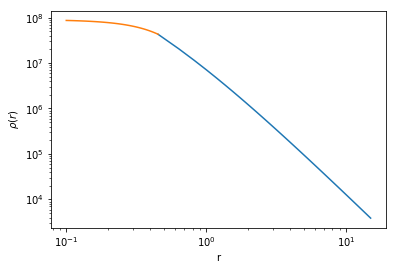

In [8]:
plt.plot(r_2,rho_soliton*0.037*rho_mayor(r_2,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39))
plt.plot(r_1,rho_soliton*0.037*rho_minor(r_1,rho_sol=0.037*rho_soliton,m_a=m_axion))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rho(r)$')
plt.xlabel('r')

In [9]:
def rho_tot(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    result = []
    for i in range(0,len(r)):
        if r[i]<r_eps:
            d = (1. + (r[i]/rsol)**2.)**8.
            result.append(rho_sol/d)
        else:
            delta_NFW = eps*(r_eps/r_s**3.)*(r_s + r_eps)**2.
            d = (r[i]/r_s**3.)*(r_s + r[i])**2.
            result.append(delta_NFW*rho_sol/d)
    return np.array(result)

Text(0.5,1,'Fornax')

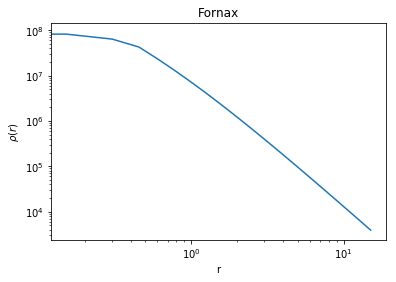

In [10]:
plt.plot(r,rho_tot(r,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rho(r)$')
plt.xlabel('r')
plt.title('Fornax')

Text(0.5,1,'Sculptor')

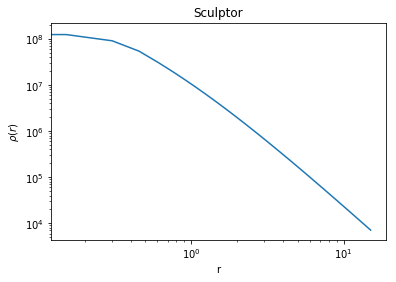

In [11]:
plt.plot(r,rho_tot(r,rho_sol=0.057*rho_soliton,m_a=m_axion,eps=0.464,r_s=0.57))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rho(r)$')
plt.xlabel('r')
plt.title('Sculptor')

In [12]:
def M_minor(r,rho_sol,m_a):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    n = 3465.*r**13.*rsol + 23100.*r**11.*rsol**3. + 65373.*r**9.*rsol**5. + 101376.*r**7.*rsol**7. + 92323.*r**5.*rsol**9. + 48580.*r**3.*rsol**11. + 3465.*(r**2.+rsol**2.)**7.*np.arctan(r/rsol) - 3465.*r*rsol**13.
    d = (r**2. +rsol**2.)**7.
    const = 4.*np.pi*rho_sol*rsol**3./215040.
    return const*n/d

Text(0,0.5,'M(r)')

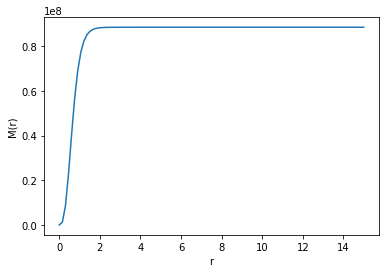

In [13]:
plt.plot(r,M_minor(r,rho_sol=0.037*rho_soliton,m_a=m_axion))
plt.xlabel('r')
plt.ylabel('M(r)')

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


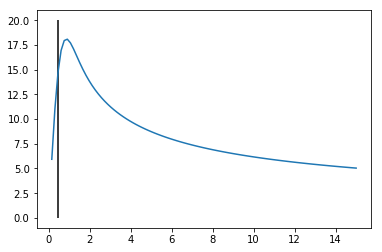

In [14]:
plt.plot(r,np.sqrt(G*M_minor(r,rho_sol=0.037*rho_soliton,m_a=m_axion)/r))
#plt.yscale('log')
plt.vlines(r_eps_1,0,20)

In [27]:
def M_mayor(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*r_eps*(r_s + r_eps)**2./r_s**3.
    #t1 = np.log(r + r_s) + r_s/(r+r_s) -np.log(r_s +r_eps) - r_s/(r_s+r_eps)#- np.log(r_s) - 1.
    t1 = (r_s+r*np.log(r+r_s) + r_s*np.log(r+r_s))/(r+r_s) - (r_s + r_s*np.log(r_s + r_eps) + r_eps*np.log(r_s+r_eps))/(r_s + r_eps)
    constant = 4.*np.pi*rho_sol*delta_NFW*r_s**3.
    n2 = 3465.*r_eps**13.*rsol + 23100.*r_eps**11.*rsol**3. + 65373.*r_eps**9.*rsol**5. + 101376.*r_eps**7.*rsol**7. + 92323.*r_eps**5.*rsol**9. + 48580.*r_eps**3.*rsol**11. + 3465.*(r_eps**2.+rsol**2.)**7.*np.arctan(r_eps/rsol) - 3465.*r_eps*rsol**13.
    d2 = (r_eps**2. +rsol**2.)**7.
    const2 = 4.*np.pi*rho_sol*rsol**3./215040.
    return constant*t1 + const2*n2/d2

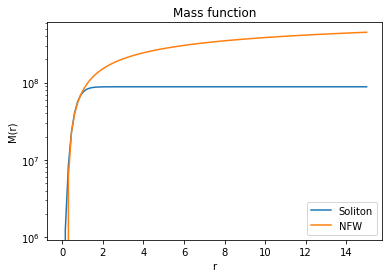

In [30]:
plt.plot(r,M_minor(r,rho_sol=0.037*rho_soliton,m_a=m_axion),label='Soliton')
plt.plot(r,M_mayor(r,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39),label='NFW')
plt.xlabel('r')
plt.ylabel('M(r)')
plt.yscale('log')
#plt.vlines(r_eps_1,0,1.0e8)
plt.title('Mass function')
plt.legend(loc='lower right', prop={'size':10})

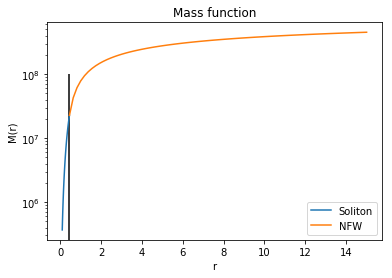

In [31]:
plt.plot(r_1,M_minor(r_1,rho_sol=0.037*rho_soliton,m_a=m_axion),label='Soliton')
plt.plot(r_2,M_mayor(r_2,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39),label='NFW')
plt.xlabel('r')
plt.ylabel('M(r)')
plt.yscale('log')
plt.vlines(r_eps_1,0,1.0e8)
plt.title('Mass function')
plt.legend(loc='lower right', prop={'size':10})

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


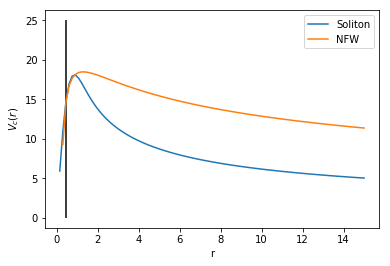

In [32]:
plt.plot(r,np.sqrt(G*M_minor(r,rho_sol=0.037*rho_soliton,m_a=m_axion)/r),label='Soliton')
plt.plot(r,np.sqrt(G*M_mayor(r,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39)/r),label='NFW')
#plt.yscale('log')
plt.vlines(r_eps_1,0,25)
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})

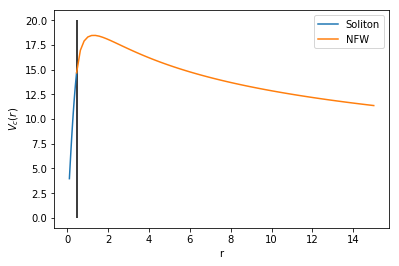

In [39]:
plt.plot(r_1,np.sqrt(G*M_minor(r_1,rho_sol=0.037*rho_soliton,m_a=m_axion)/r_1),label='Soliton')
plt.plot(r_2,np.sqrt(G*M_mayor(r_2,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39)/r_2),label='NFW')
#plt.yscale('log')
plt.vlines(r_eps_1,0,20)
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})

In [34]:
def vc2_tot(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    result = []
    for i in range(0,len(r)):
        if r[i]<r_eps:
            result.append(G*M_minor(r[i],rho_sol,m_a)/r[i])
        else:
            result.append(G*M_mayor(r[i],rho_sol,m_a,eps,r_s)/r[i])
    return np.array(result)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Fornax')

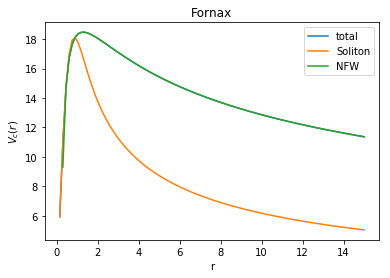

In [43]:
plt.plot(r,np.sqrt(vc2_tot(r,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39)),label='total')
plt.plot(r,np.sqrt(G*M_minor(r,rho_sol=0.037*rho_soliton,m_a=m_axion)/r),label='Soliton')
plt.plot(r,np.sqrt(G*M_mayor(r,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39)/r),label='NFW')
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Fornax')

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Text(0.5,1,'Sculptor')

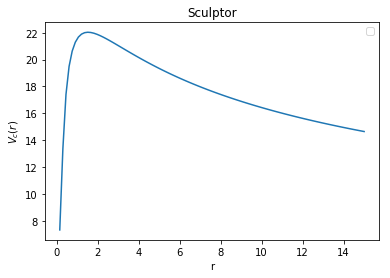

In [40]:
plt.plot(r,np.sqrt(vc2_tot(r,rho_sol=0.057*rho_soliton,m_a=m_axion,eps=0.464,r_s=0.57)))
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Sculptor')

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Text(0.5,1,'Rotational curves')

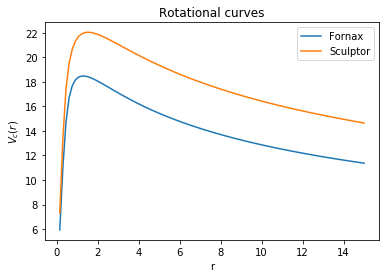

In [42]:
plt.plot(r,np.sqrt(vc2_tot(r,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39)),label='Fornax')
plt.plot(r,np.sqrt(vc2_tot(r,rho_sol=0.057*rho_soliton,m_a=m_axion,eps=0.464,r_s=0.57)),label='Sculptor')
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Rotational curves')